In [13]:
import sys
sys.path.insert(1, '../functions')

from pickle_functions import open_pickle
from matplotlib.offsetbox import AnchoredText

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(rc={'figure.figsize':(12, 3)}, font_scale=1.3)

C_BLUE = sns.color_palette()[0]
C_ORANGE = sns.color_palette()[1]
C_GREEN = sns.color_palette()[2]

In [14]:
df = pd.read_csv("geometric_measurements.csv")

In [15]:
curv_i = open_pickle("mc_vals_I.pkl")
curv_m = open_pickle("mc_vals_M.pkl")
curv_f = open_pickle("mc_vals_F.pkl")

# Protuberances count per TL

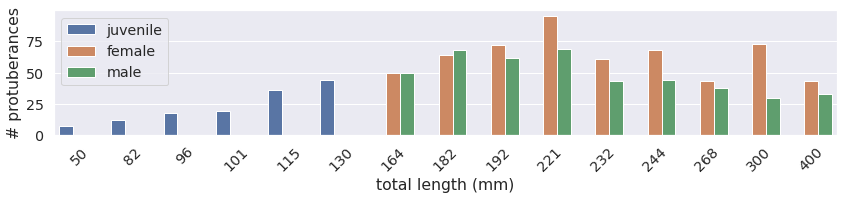

In [16]:
ax = sns.barplot(x="fish_length_mm", y="cluster_n", hue="gender", data=df)

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["juvenile", "female", "male"], loc="upper left")


plt.xlabel("total length (mm)")
plt.ylabel("# protuberances")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/home/steven/scriptie/code/analysis/figures/tl_nop.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# Density curves for H

## All females + all males (Rob's suggestion)

In [ ]:
i = curv_f
ax = sns.kdeplot(i["mean_curvature"].to_numpy(), gridsize=1000000, label="female", shade=True, color=C_ORANGE)

i = curv_m
ax = sns.kdeplot(i["mean_curvature"].to_numpy(), gridsize=1000000, label="male", shade=True, color=C_GREEN)

plt.ylim(0, 40)
plt.xlim(-0.1, 0.1)
plt.xlabel("mean curvature")
plt.ylabel("density")
plt.tight_layout()
plt.savefig("/home/steven/scriptie/code/analysis/figures/kde_ROB.png", bbox_inches="tight", pad_inches=0)

plt.show()
plt.clf()

## Per female-male pair of equal TL

50, 50


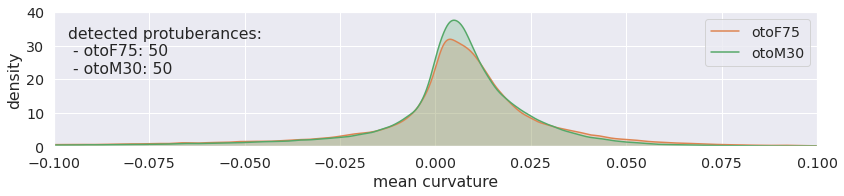

64, 68


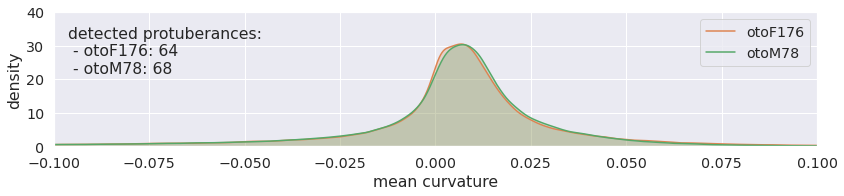

72, 62


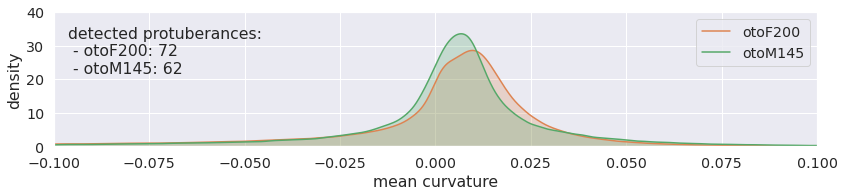

95, 69


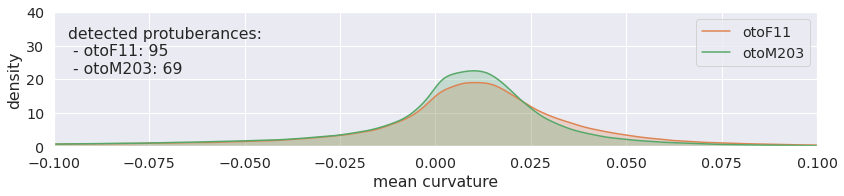

61, 43


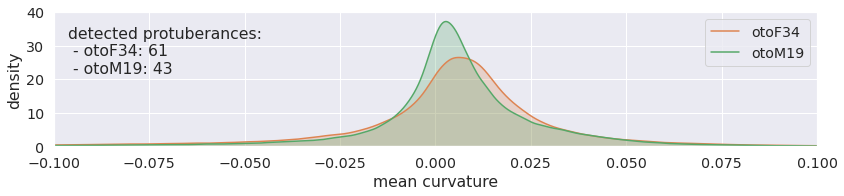

68, 44


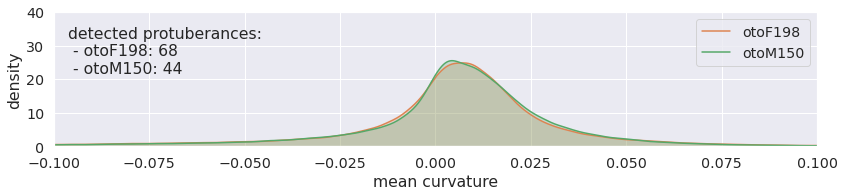

43, 38


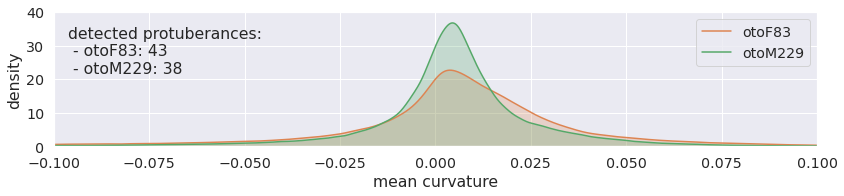

73, 30


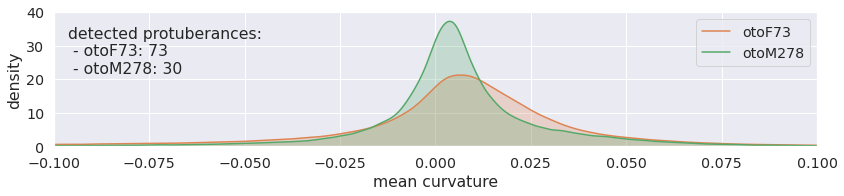

43, 33


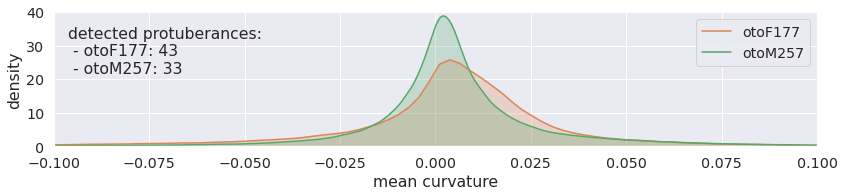

<Figure size 864x216 with 0 Axes>

In [9]:
for i in range(len(curv_f["label"].unique())):
    f_label = curv_f["label"].unique()[i]
    m_label = curv_m["label"].unique()[i]
    
    f_clusters_n = int(df[df["label"] == f_label]["cluster_n"])
    m_clusters_n = int(df[df["label"] == m_label]["cluster_n"])
    
    print("%s, %s" % (f_clusters_n, m_clusters_n))
    
    i = curv_f[curv_f["label"] == f_label]
    ax = sns.kdeplot(i["mean_curvature"].to_numpy(), gridsize=1000000, label=f_label, shade=True, color=C_ORANGE)
    
    i = curv_m[curv_m["label"] == m_label]
    ax = sns.kdeplot(i["mean_curvature"].to_numpy(), gridsize=1000000, label=m_label, shade=True, color=C_GREEN)

    anc = AnchoredText("detected protuberances:\n - %s: %s \n - %s: %s" % (f_label, f_clusters_n, m_label, m_clusters_n), loc="upper left", frameon=False)
    ax.add_artist(anc)
    
    plt.ylim(0, 40)
    plt.xlim(-0.1, 0.1)
    plt.xlabel("mean curvature")
    plt.ylabel("density")
    plt.tight_layout()
#     plt.savefig("/home/steven/scriptie/code/analysis/figures/kde_%s_%s.png" % (f_label, m_label), bbox_inches="tight", pad_inches=0)
    plt.show()
    plt.clf()